# Simulating Gate Noise


## Pure states vs. mixed states

Errors in quantum computing can introduce classical uncertainty in what the underlying state is.
When this happens we sometimes need to consider not only wavefunctions but also probabilistic sums of
wavefunctions when we are uncertain as to which one we have. For example, if we think that an X gate
was accidentally applied to a qubit with a 50-50 chance then we would say that there is a 50% chance
we have the $\ket{0}$ state and a 50% chance that we have a $\ket{1}$ state.
This is called an "impure" or
"mixed"state in that it isn't just a wavefunction (which is pure) but instead a distribution over
wavefunctions. We describe this with something called a density matrix, which is generally an
operator. Pure states have very simple density matrices that we can write as an outer product of a
ket vector $\ket{\psi}$ with its own bra version $\bra{\psi}=\ket{\psi}^\dagger$.
For a pure state the density matrix is simply


$$
   \rho_\psi = \ket{\psi}\bra{\psi}.
$$
The expectation value of an operator for a mixed state is given by

$$
   \langle X \rangle_\rho = Tr({X \rho})
$$
where $Tr(A)$ is the trace of an operator, which is the sum of its diagonal elements
which is independent of choice of basis.
Pure state density matrices satisfy

$$
   \rho \text{ is pure } \Leftrightarrow \rho^2 = \rho
$$
which you can easily verify for $\rho_\psi$ assuming that the state is normalized.
If we want to describe a situation with classical uncertainty between states $\rho_1$ and
$\rho_2$, then we can take their weighted sum
$$
   \rho = p \rho_1 + (1-p) \rho_2
$$
where $p\in [0,1]$ gives the classical probability that the state is $\rho_1$.

Note that classical uncertainty in the wavefunction is markedly different from superpositions.
We can represent superpositions using wavefunctions, but use density matrices to describe
distributions over wavefunctions. You can read more about density matrices [here](https://en.wikipedia.org/wiki/Density_matrix).

# Quantum gate errors
## What are they?
For a quantum gate given by its unitary operator $U$, a "quantum gate error" describes the scenario in which the actually induces transformation deviates from $\ket{\psi} \mapsto U\ket{\psi}$. 
There are two basic types of quantum gate errors:

1. **coherent errors** are those that preserve the purity of the input state, i.e., instead of the above mapping we carry out a perturbed, but unitary operation $\ket{\psi} \mapsto \tilde{U}\ket{\psi}$, where $\tilde{U} \neq U$.  
2. **incoherent errors** are those that do not preserve the purity of the input state, 
    in this case we must actually represent the evolution in terms of density matrices. 
    The state $\rho := \ket{\psi}\bra{\psi}$ is then mapped as 
    $$
    \rho \mapsto \sum_{j=1}^n K_j\rho K_j^\dagger, 
    $$ 
    where the operators $\{K_1, K_2, \dots, K_m\}$ are called Kraus operators and must obey 
    $\sum_{j=1}^m K_j^\dagger K_j = I$ to conserve the trace of $\rho$. 
    Maps expressed in the above form are called Kraus maps. It can be shown that every physical map on a finite
    dimensional quantum system can be represented as a Kraus map, though this representation is not generally unique.
    [You can find more information about quantum operations here](https://en.wikipedia.org/wiki/Quantum_operation#Kraus_operators)
  
In a way, coherent errors are *in principle* amendable by more precisely calibrated control. Incoherent errors are more tricky.

## Why do incoherent errors happen?
When a quantum system (e.g., the qubits on a quantum processor) is not perfectly isolated from its environment it generally co-evolves with the degrees of freedom it couples to. The implication is that while the total time evolution of system and environment can be assumed to be unitary, restriction to the system state generally is not.

**Let's throw some math at this for clarity:**
Let our total Hilbert space be given by the tensor product of system and environment Hilbert spaces:
$\mathcal{H} = \mathcal{H}_S \otimes \mathcal{H}_E$.
Our system "not being perfectly isolated" must be translated to the statement that the global Hamiltonian contains a contribution that couples the system and environment:
$$
H = H_S \otimes I + I \otimes H_E + V
$$
where $V$ non-trivally acts on both the system and the environment.
Consequently, even if we started in an initial state that factorized over system and environment $\ket{\psi}_{S,0}\otimes \ket{\psi}_{E,0}$
if everything evolves by the Schrödinger equation
$$
\ket{\psi_t} = e^{-i \frac{Ht}{\hbar}} \left(\ket{\psi}_{S,0}\otimes \ket{\psi}_{E,0}\right)
$$
the final state will generally not admit such a factorization.

## A toy model
**In this (somewhat technical) section we show how environment interaction can corrupt an identity gate and derive its Kraus map.**
For simplicity, let us assume that we are in a reference frame in which both the system and environment Hamiltonian's vanish $H_S = 0, H_E = 0$ and where the cross-coupling is small even when multiplied by the duration of the time evolution $\|\frac{tV}{\hbar}\|^2 \sim \epsilon \ll 1$ (any operator norm $\|\cdot\|$ will do here).
Let us further assume that $V = \sqrt{\epsilon} V_S \otimes V_E$ (the more general case is given by a sum of such terms) and that 
the initial environment state satisfies $\bra{\psi}_{E,0} V_E\ket{\psi}_{E,0} = 0$. This turns out to be a very reasonable assumption in practice but a more thorough discussion exceeds our scope.

Then the joint system + environment state $\rho = \rho_{S,0} \otimes \rho_{E,0}$ (now written as a density matrix) evolves as
$$
\rho \mapsto \rho' :=  e^{-i \frac{Vt}{\hbar}} \rho e^{+i \frac{Vt}{\hbar}}
$$
Using the Baker-Campbell-Hausdorff theorem we can expand this to second order in $\epsilon$
$$
\rho' = \rho - \frac{it}{\hbar} [V, \rho] - \frac{t^2}{2\hbar^2} [V, [V, \rho]] + O(\epsilon^{3/2})
$$
We can insert the initially factorizable state $\rho = \rho_{S,0} \otimes \rho_{E,0}$ and trace over the environmental degrees of freedom to obtain
\begin{align}
\rho_S' := \tr_E \rho' & = \rho_{S,0}  \underbrace{\tr \rho_{E,0}}_{1} - \frac{i\sqrt{\epsilon} t}{\hbar} \underbrace{\left[ V_S \rho_{S,0} \underbrace{\tr V_E\rho_{E,0}}_{\bra{\psi}_{E,0} V_E\ket{\psi}_{E,0} = 0} - \rho_{S,0}V_S  \underbrace{\tr \rho_{E,0}V_E}_{\bra{\psi}_{E,0} V_E\ket{\psi}_{E,0} = 0} \right]}_0 \\
& \qquad - \frac{\epsilon t^2}{2\hbar^2} \left[ V_S^2\rho_{S,0}\tr V_E^2 \rho_{E,0} + \rho_{S,0} V_S^2 \tr \rho_{E,0}V_E^2 - 2 V_S\rho_{S,0}V_S\tr V_E \rho_{E,0}V_E\right] \\
& = \rho_{S,0} - \frac{\gamma}{2} \left[ V_S^2\rho_{S,0} + \rho_{S,0} V_S^2  - 2 V_S\rho_{S,0}V_S\right]
\end{align}
where the coefficient in front of the second part is by our initial assumption very small $\gamma := \frac{\epsilon t^2}{2\hbar^2}\tr V_E^2 \rho_{E,0} \ll 1$.
This evolution happens to be approximately equal to a Kraus map with operators $K_1 := I - \frac{\gamma}{2} V_S^2, K_2:= \sqrt{\gamma} V_S$:
\begin{align}
\rho_S \to \rho_S' &= K_1\rho K_1^\dagger + K_2\rho K_2^\dagger
 = \rho - \frac{\gamma}{2}\left[ V_S^2 \rho + \rho V_S^2\right] + \gamma V_S\rho_S V_S + O(\gamma^2)
\end{align}
This agrees to $O(\epsilon^{3/2})$ with the result of our derivation above. This type of derivation can be extended to many other cases with little complication and a very similar argument is used to derive the [Lindblad master equation](https://en.wikipedia.org/wiki/Lindblad_equation).

# Support for noisy gates on the Rigetti QVM

As of today, users of our Forest API can annotate their QUIL programs by certain pragma statements that inform the QVM that a particular gate on specific target qubits should be replaced by an imperfect realization given by a Kraus map.

The QVM propagates **pure states** — so how does it simulate noisy gates? It does so by yielding the correct outcomes **in the average over many executions of the QUIL program**:
When the noisy version of a gate should be applied the QVM makes a random choice which Kraus operator is applied to the current state with a probability that ensures that the average over many executions is equivalent to the Kraus map.
In particular, a particular Kraus operator $K_j$ is applied to $\ket{\psi}_S$
$$
\ket{\psi'}_S = \frac{1}{\sqrt{p_j}} K_j \ket{\psi}_S
$$
with probability $p_j:= \bra{\psi}_S K_j^\dagger K_j \ket{\psi}_S$.
In the average over many execution $N \gg 1$ we therefore find that
\begin{align}
\overline{\rho_S'} & = \frac{1}{N} \sum_{n=1}^N \ket{\psi'_n}_S\bra{\psi'_n}_S \\
& = \frac{1}{N} \sum_{n=1}^N p_{j_n}^{-1}K_{j_n}\ket{\psi}_S \bra{\psi}_SK_{j_n}^\dagger
\end{align}
where $j_n$ is the chosen Kraus operator label in the $n$-th trial.
This is clearly a Kraus map itself! And we can group identical terms and rewrite it as
\begin{align}
\overline{\rho_S'} & = 
  \sum_{\ell=1}^n \frac{N_\ell}{N}  p_{\ell}^{-1}K_{\ell}\ket{\psi}_S \bra{\psi}_SK_{\ell}^\dagger
\end{align}
where $N_{\ell}$ is the number of times that Kraus operator label $\ell$ was selected.
For large enough $N$ we know that $N_{\ell} \approx N p_\ell$ and therefore
\begin{align}
\overline{\rho_S'} \approx \sum_{\ell=1}^n K_{\ell}\ket{\psi}_S \bra{\psi}_SK_{\ell}^\dagger
\end{align}
which proves our claim.
**The consequence is that noisy gate simulations must generally be repeated many times to obtain representative results**.

# Noisy simulator for pyquil

The module new_noise.py facilitates the execution of a realistic simulation of a noisy quantum computer, providing users with an accessible and robust tool. The core functionality emulates Rigetti's quantum computers, utilizing current calibration data from the company. Additionally, users have the ability to explore the effects of varying noise intensity or specifying alternative noise parameters.

In the following sections, we will delve into the workings of the simulator, along with a comprehensive guide on its usage, accompanied by illustrative examples.


## How does the simulator work?

The simulator employs Kraus operators as its foundation, as described previously. However, instead of incorporating Kraus operators directly into the gate (which poses challenges for parametric gates and does not account for effects on other qubits), we apply them to unity matrices following each gate. This serves as the fundamental concept behind the simulator.

It is important to note that the majority of gates utilized in quantum programs are not physically realized within the quantum computer. Instead, they are implemented using a limited set of native gates. For instance, in Rigetti's Aspen-M-3 computer, the native gates include RX, RZ, CZ, CPHASE, and XY. To accurately simulate the real computer, the simulator, by default, translates the program into native gates and subsequently introduces noise into the native program, unless the user specifies otherwise.

### Depolarizing

Upon the application of a gate to a qubit, some quantum information may be lost, resulting in the density matrix representing the qubit being mapped to a linear combination of itself and a maximally mixed state. For each qubit and gate, the fidelity is known, which is the probability of the qubit remaining consistent.

The corresponding Kraus operators (with $\lambda = 1 - \text{fidelity}$) are as follows:

$$
K_0 = \sqrt{1- \frac{3 \lambda}{4}}I
$$
$$
K_1 = \sqrt{\frac{\lambda}{4}} \sigma_X
$$
$$
K_2 = \sqrt{\frac{\lambda}{4}} \sigma_Y
$$
$$
K_3 = \sqrt{\frac{\lambda}{4}} \sigma_Z
$$

[For further information on quantum depolarizing channels, please refer to this.](https://en.wikipedia.org/wiki/Quantum_depolarizing_channel)

After each gate, the depolarizing channel is applied to the target qubits. Although there is a probability, dictated by the fidelity, that nothing will occur, there remains the possibility that the qubit will transition into a maximally mixed state.

### Decoherence

Each gate possesses a specific duration time. Within this module, we assume that the duration of a two-qubit gate is 176 nanoseconds, while the duration of a one-qubit gate is 32 nanoseconds.

During the application of a two-qubit gate, other gates are typically not applied to the additional qubits involved in the program. However, these qubits do experience a waiting period and are subject to decoherence noise: damping and dephasing. The Kraus operators representing damping and dephasing are determined by the times T1 and T2; longer times indicate lower noise levels for the qubit. Consequently, after each two-qubit gate in the program, we introduce noise intensity gates (for damping and dephasing) to all other qubits in the program.

One-qubit gates are presumed to be applied simultaneously, so by default, we do not apply decoherence noise (representing waiting) to qubits not participating in the gate. This default setting can be altered as needed.

Amplitude **damping** channels are imperfect identity maps with Kraus operators
$$
K_1 = \begin{pmatrix} 
1 & 0 \\
0 & \sqrt{1-p}
\end{pmatrix} \\
K_2 = \begin{pmatrix} 
0 & \sqrt{p} \\
0 & 0
\end{pmatrix}
$$
Here, $p$ represents the probability that a qubit in the $\ket{1}$ state decays to the $\ket{0}$ state, and it is given by $p = 1 - \exp(-T_{\rm gate}/T_1)$.

**Dephasing** is usually characterized through a qubit's $T_2$ time. 
For a single qubit the dephasing Kraus operators are
$$
K_1(p) = \sqrt{1-p} I_2 \\
K_2(p) = \sqrt{p} \sigma_Z
$$
In this case, $p = 0.5 * (1 - exp(-(\frac{\text{gate_time}}{T_2} - \frac{\text{gate_time}}{2 \cdot T_1})))$ denotes the probability that the qubit is dephased over the time interval of interest, $I_2$ is the $2\times 2$-identity matrix, and $\sigma_Z$ is the Pauli-Z operator.

These two sets of Kraus operators are combined to simulate damping after dephasing, resulting in decoherence noise.

### Readout

The final category of noise, readout noise, is distinct from the previously discussed types. For each qubit, the readout fidelity is known, which is the probability that the read value is accurate. This probability is assumed to be identical for obtaining 0 when the qubit is in state 0 and acquiring 1 when the qubit is in state 1.

The QVM is capable of handling a Pragma that incorporates readout noise. Therefore, the Pyquil module only needs to construct the appropriate Pragma according to the corresponding fidelities.


## Usage

### Basic usage

Utilizing the simulator is straightforward: First, create a quantum computer object and a program, and then provide them as parameters to the function. The output will be a noisy version of the program, simulating the real quantum computer specified as an input. The process can be summarized as follows:


In [1]:
import pyquil
from pyquil.quil import Program
from pyquil.api import get_qc
from pyquil.noise import add_noise_to_program


# create a Quantum computer object:
qc = get_qc('Aspen-M-3', as_qvm=True)
# create a program:
prog = Program()
# write your quantum program...

# get the noisy version of your program, fitted to the quantum computer you chose:
noisy_prog = add_noise_to_program(qc=qc, p=prog)
noisy_prog = add_noise_to_program(qc=qc, p=prog, depolarizing=False, decoherence_after_2q_gate=False, decoherence_only_on_targets=True)

ModuleNotFoundError: No module named 'pyquil'

### Advanced usage

Certain users may not only wish to evaluate the behavior of their program on a real Rigetti quantum computer, but also explore the effects of varying noise levels or the resolution of specific noise types. Some users might want to define their own fidelities and decoherence times, while others may be interested in investigating different gate types with new estimated noise parameters. For these users, the basic function can be further customized and adapted to accommodate a wide range of requirements.

#### **convert to native gates:**

As previously discussed, the function's default behavior is to convert the program into native gates before introducing noise. However, this approach may be problematic in two scenarios:

If a user has already written their program using native gates and desires them to execute exactly as written (without altering the qubits or optimizing the program), the default compiler may modify their choices.
If a user wishes to explore the potential of non-native gates, accompanied by their own estimated noise parameters, the default function will convert these gates into native ones, defeating the purpose.
In such instances, the solution is to instruct the function not to convert the program into native gates. This can be achieved with the following command:

`noisy_prog = add_noise_to_program(qc=qc, p=prog, convert_to_native=False)`

#### **intensity parameter:**

You can assess the impact of noise on your program by adjusting the noise intensity. The default value is 1, which corresponds to the noise level in a real quantum computer. This parameter can be varied from 0 (no noise) to infinity (extremely noisy). For example, to reduce the noise intensity to 0.5, proceed as follows:
`noisy_prog = add_noise_to_program(qc=qc, p=prog, noise_intensity=0.5)`

#### **Setting noise types:**

You can also configure the types of noise you want to introduce to the program. As previously mentioned, the default assumption is that two-qubit gates operate independently, while one-qubit gates run simultaneously. This assumption may not hold true for different types of programs, so users can modify the settings accordingly. If single-qubit gates do not operate simultaneously, you can add decoherence noise to all other qubits in the program while the one-qubit gate is being applied, effectively simulating the waiting process for the remaining qubits:

`noisy_prog = add_noise_to_program(qc=qc, p=prog, decoherence_after_1q_gate=True)`

Conversely, if your two-qubit gates operate simultaneously, you can eliminate the waiting noise following the execution of two-qubit gates:
`noisy_prog = add_noise_to_program(qc=qc, p=prog, decoherence_after_2q_gate=False)`

Additionally, you have the option to exclude readout noise, depolarizing noise, or any combination thereof:
`noisy_prog = add_noise_to_program(qc=qc, p=prog, readout_noise=False, depolarizing=False)`

When depolarizing noise is enabled, the target qubit does not receive additional decoherence "waiting" noise, as it is already incorporated within the depolarizing noise. If you choose to disable depolarizing noise, the target qubit, along with all other qubits in the program, will still be subject to decoherence noise based on the parameters `decoherence_after_1q_gate` and `decoherence_after_2q_gate`. You can also configure the target qubit to receive decoherence noise according to the gate time, as demonstrated below:

`noisy_prog = add_noise_to_program(qc=qc, p=prog, depolarizing=False, decoherence_after_2q_gate=False, decoherence_only_on_targets=True)`


#### **Calibrations**

When selecting a quantum computer object and providing it to the function, its calibrations are stored in a class called `Calibrations`. Each noise type is stored as a dictionary that maps a qubit to its fidelity or time (depending on the noise type). The dictionaries include: T1, T2, readout_fidelity, and fidelities - which is a nested dictionary for each gate. The class also contains a set of two-qubit gates present in the computer.

In a basic usage of the function, the quantum computer's name is provided, and the appropriate calibrations for the specified computer are retrieved from the web. (A future improvement could involve obtaining this information directly, without relying on a specific URL and JSON format).

Often, you may want to run a loop to test your program with various modifications on the same computer. In such cases, constructing the Calibration instance from the web can be inefficient. A better practice would be to create the instance explicitly once and pass it as a parameter to the function:

`cal = Calibrations('Aspen-M-3')`

`noisy_prog = add_noise_to_program(qc, prog, calibrations=cal)`

If you want to define custom noise parameters or gate types, you should create an instance of `Calibrations`, populate it with your own data, and then provide it as a parameter to the function:


In [15]:
from pyquil.noise import Calibrations

cal = Calibrations()
cal.T1 = {0: 1.6e-5, 1: 5.1e-6}
cal.T2 = {0: 7.6e-6, 1: 9.3e-6}
cal.two_q_gates = set(['XY'])
cal.readout_fidelity = {0: 0.994, 1: 0.984}
# attention: in "fidelities" (and only there), the qubit indeces are strings, not integers.
cal.fidelities["1Q_gate"] = {'0': 0.999, '1': 0.998}
cal.fidelities["XY"] = {'0-1': 0.977}

noisy_prog = add_noise_to_program(qc, prog, calibrations=cal)

## Example: GHZ

In a GHZ state, three qubits are entangled, and the measurement results should ideally be half '000' and half '111'. The Greenberger-Horne-Zeilinger (GHZ) experiment is an important demonstration of quantum entanglement involving three or more qubits. This entangled state is highly sensitive to noise and decoherence, making it an ideal testbed for evaluating the performance of quantum computers and error mitigation techniques.

The GHZ experiment can be implemented using the following sequence of quantum gates:

Apply a Hadamard gate (H) to the first qubit, which puts it in an equal superposition of '0' and '1' states.
Apply a CNOT gate between the first and second qubits, creating entanglement between them.
Apply another CNOT gate between the second and third qubits, resulting in the entanglement of all three qubits.
After performing these operations, the resulting GHZ state is $(\ket{000} + \ket{111})/\sqrt{2}$. Due to noise, the actual program will yield other results as well. In this example, we examine the results for a noise-free program, as well as the outcomes for a noisy program that simulates a run on Rigetti's Aspen-M-2 computer. Furthermore, we investigate what would have occurred if all noise levels were reduced to half of their actual values. By examining the outcomes of the GHZ experiment in the presence of different noise levels, researchers can gain insights into the behavior of quantum computers under various conditions and investigate strategies for improving their performance.

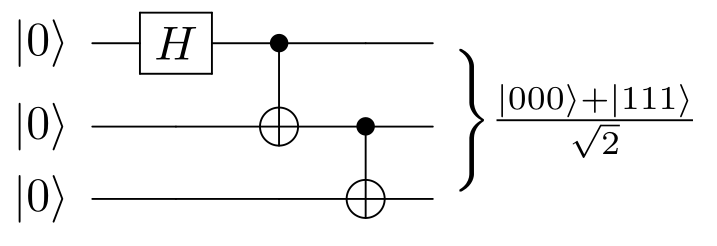

In [19]:
from pyquil.quil import Program
from pyquil.gates import H, MEASURE, CNOT
from pyquil.api import get_qc
from pyquil.noise import add_noise_to_program, Calibrations
import matplotlib.pyplot as plt

def ghz(qc, qubits, numshots, noise=False, cal=None, intensity=1.0):
    p = Program()
    p.declare("ro", "BIT", 3)
    p += H(qubits[0])
    p += CNOT(qubits[0], qubits[1])
    p += CNOT(qubits[1], qubits[2])
    p += MEASURE(qubits[0], ("ro", 0))
    p += MEASURE(qubits[1], ("ro", 1))
    p += MEASURE(qubits[2], ("ro", 2))
    p.wrap_in_numshots_loop(numshots)
    if noise:
        if cal is not None:
            p = add_noise_to_program(qc, p, calibrations=cal, noise_intensity=intensity)
        else:
            p = add_noise_to_program(qc, p, noise_intensity=intensity)
    return p

def run_experiment(qpu, qubits, numshots):
    qvm = get_qc(qpu, as_qvm=True, execution_timeout=1000)
    cal = Calibrations(qvm)
    no_noise = qvm.run(ghz(qvm,qubits,numshots, False)).readout_data.get("ro")
    half_noise = qvm.run(ghz(qvm,qubits,numshots, True, cal, intensity=0.5)).readout_data.get("ro")
    noisy = qvm.run(ghz(qvm,qubits,numshots, True, cal)).readout_data.get("ro")
    return no_noise, half_noise, noisy

def plot_results(results, label):
    histogram={}
    for i in results:
        code=("00"+str(int(float(i[2])*100+float(i[1])*10+float(i[0]))))[-3:]
        histogram[code]=histogram.get(code,0)+1
    histogram=dict(sorted(histogram.items()))
    plt.bar(*zip(*histogram.items()), label=label)
    plt.xlabel('State')
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

no_noise, half_noise, noisy = run_experiment('Aspen-M-3',[0,1,2], 1000)
plot_results(no_noise, 'no noise')
plot_results(half_noise, 'half noise')
plot_results(noisy, 'noisy')

[[0 0 0]
 [0 0 0]
 [1 1 1]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1]
 [0 0 0]
 [0 0 0]
 ...
 [1 1 1]
 [1 1 1]
 [1 0 1]]
[[0 0 0]
 [0 0 0]
 [0 1 1]
 ...
 [1 1 1]
 [1 1 1]
 [1 0 0]]
